In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


facts_table = pd.read_csv('facts_table.csv')
facts_table.head()

,device_id,time_diff,battery_diff,rate,charging,number_samples,screen_on_time,screen_off_time,bluetooth_enabled_time,location_enabled_time,power_saver_enabled_time,flashlight_enabled_time,nfc_enabled_time,developer_mode_time
0,1,5.67,-0.65,-0.115,False,58,4.93,0.74,0.0,5.45,0.0,0.0,0.0,0.0
1,1,0.98,0.46,0.471,True,47,0.00,0.98,0.0,0.88,0.0,0.0,0.0,0.0
2,1,1.15,-0.10,-0.087,False,11,1.09,0.06,0.0,1.09,0.0,0.0,0.0,0.0
3,1,0.84,0.29,0.344,True,30,0.86,-0.02,0.0,0.86,0.0,0.0,0.0,0.0
4,1,0.32,-0.03,-0.095,False,4,0.21,0.11,0.0,0.21,0.0,0.0,0.0,0.0


<h1><center>Single Devices overall rate stats</center></h1>

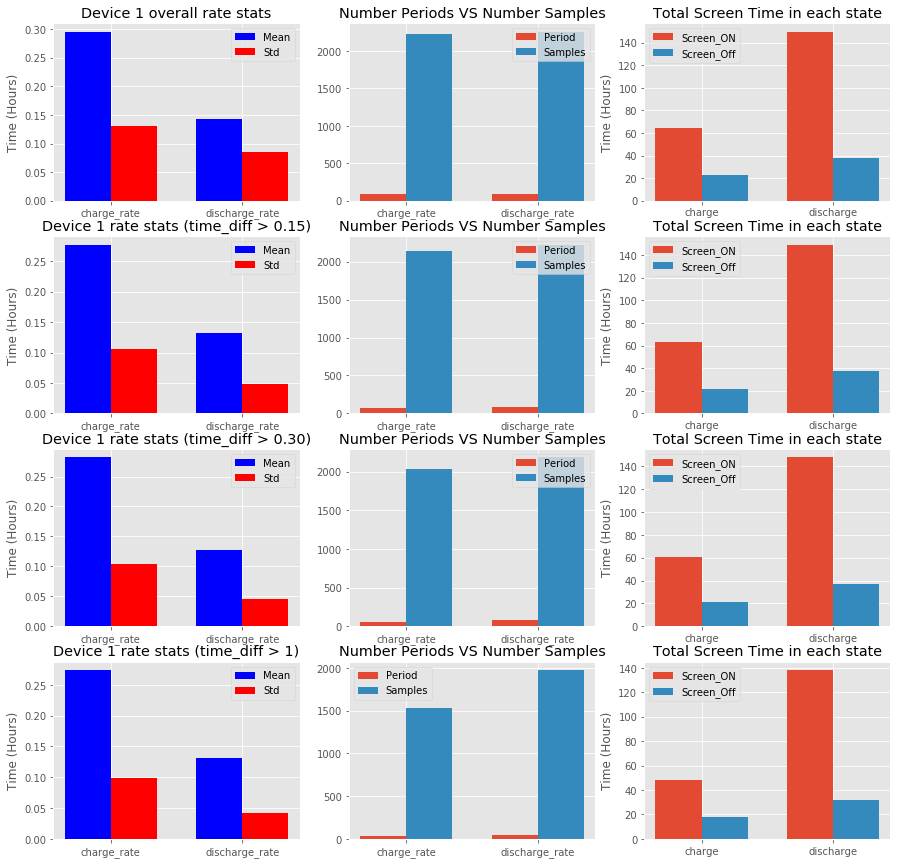

In [2]:
def plotScreenTime(dev_samples, title, devID):
    charge_screen_on_time = dev_samples[dev_samples.charging == True].screen_on_time.sum()
    charge_screen_off_time = dev_samples[dev_samples.charging == True].screen_off_time.sum()
    
    discharge_screen_on_time = dev_samples[dev_samples.charging == False].screen_on_time.sum()
    discharge_screen_off_time = dev_samples[dev_samples.charging == False].screen_off_time.sum()
    
    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35
    
    rec1 = plt.bar(x, [charge_screen_on_time, discharge_screen_on_time], width)
    rec2 = plt.bar(x+width, [charge_screen_off_time, discharge_screen_off_time], width)  

    plt.title(title)
    plt.xticks(x + width / 2, ('charge','discharge'))
    plt.legend(['Screen_ON', 'Screen_Off'])
    plt.ylabel('Time (Hours)')

def plotRate_NumberSamples(dev_samples, title, devID):
    charge_number_periods = len(dev_samples[dev_samples.charging == True])
    charge_number_samples = dev_samples[dev_samples.charging == True].number_samples.sum()
    
    discharge_number_periods = len(dev_samples[dev_samples.charging == False])
    discharge_number_samples = dev_samples[dev_samples.charging == False].number_samples.sum()
    
    charge_number_samples_mean = dev_samples[dev_samples.charging == True].number_samples.mean()
    discharge_number_samples_mean = dev_samples[dev_samples.charging == False].number_samples.mean()
    
    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35
    
    plt.bar(x, [charge_number_periods, discharge_number_periods], width)
    plt.bar(x+width, [charge_number_samples, discharge_number_samples], width)

    plt.title(title)
    plt.xticks(x + width / 2, ('charge_rate','discharge_rate'))
    plt.legend(['Period', 'Samples', 'Avg Samples'])
    
    
def plotRateStat(dev_samples, title, devID):
    charge_rate_mean = dev_samples[dev_samples.charging == True].rate.mean()
    charge_rate_std = dev_samples[dev_samples.charging == True].rate.std()

    discharge_rate_mean = dev_samples[dev_samples.charging == False].rate.mean()
    discharge_rate_std = dev_samples[dev_samples.charging == False].rate.std()

    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35

    plt.bar(x, [round(charge_rate_mean, 3), abs(round(discharge_rate_mean, 3))], width, color='b')
    plt.bar(x+width, [abs(round(charge_rate_std, 3)), abs(round(discharge_rate_std, 3))], width, color='r')    

    plt.ylabel('Time (Hours)')
    plt.title(title % devID)
    plt.xticks(x + width / 2, ('charge_rate','discharge_rate'))
    plt.legend(['Mean', 'Std'])


def computeRatesDevicePlot(devID):
    dev_samples = facts_table[facts_table.device_id == devID]
    
    plt.subplots(4,3,figsize=(15, 15))
    plt.subplot(4, 3, 1)
    plotRateStat(dev_samples, 'Device %i overall rate stats', devID)
    plt.subplot(4, 3, 2)
    plotRate_NumberSamples(dev_samples, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 3)
    plotScreenTime(dev_samples, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 4)
    dev_samples_15 = dev_samples[dev_samples.time_diff > 0.15]
    plotRateStat(dev_samples_15, 'Device %i rate stats (time_diff > 0.15)', devID)
    plt.subplot(4, 3, 5)
    plotRate_NumberSamples(dev_samples_15, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 6)
    plotScreenTime(dev_samples_15, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 7)
    dev_samples_30 = dev_samples[dev_samples.time_diff > 0.3]
    plotRateStat(dev_samples_30, 'Device %i rate stats (time_diff > 0.30)', devID)
    plt.subplot(4, 3, 8)
    plotRate_NumberSamples(dev_samples_30, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 9)
    plotScreenTime(dev_samples_30, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 10)
    dev_samples_1 = dev_samples[dev_samples.time_diff > 1]
    plotRateStat(dev_samples_1, 'Device %i rate stats (time_diff > 1)', devID)
    plt.subplot(4, 3, 11)
    plotRate_NumberSamples(dev_samples_1, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 12)
    plotScreenTime(dev_samples_1, 'Total Screen Time in each state', devID)

    plt.show()

# change this id for other device
devID = 1
computeRatesDevicePlot(devID)

<h1><center>TOP 20 Devices with most periods, overall rates</center></h1>

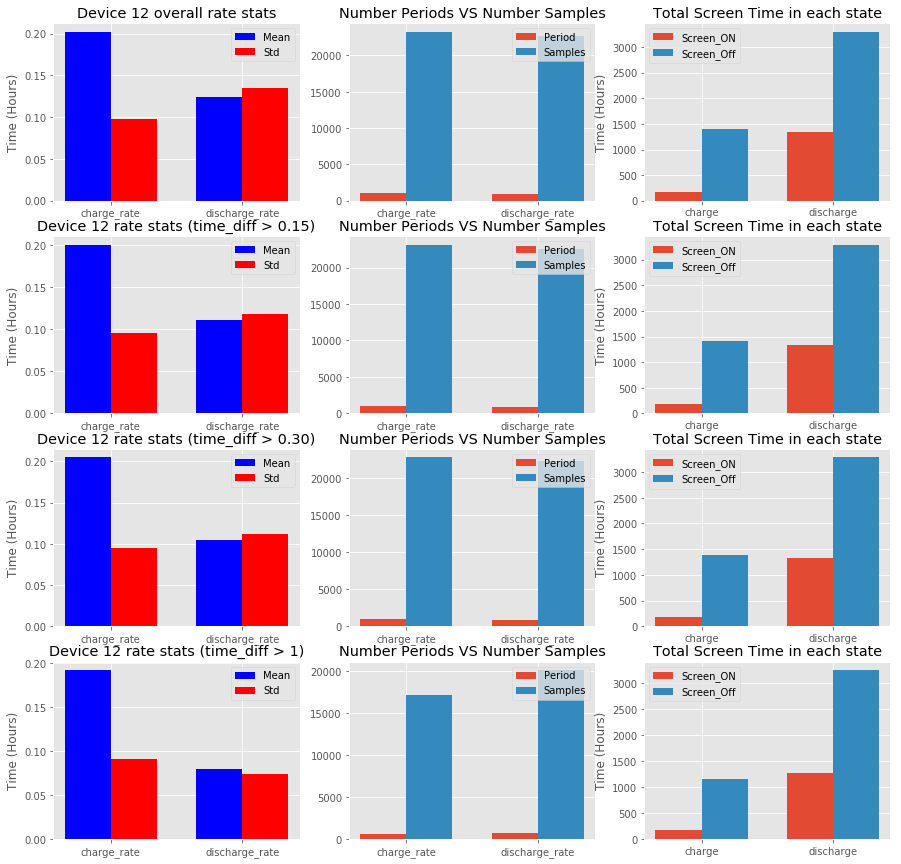

-------------------------------------------------------------------------------------------------------------


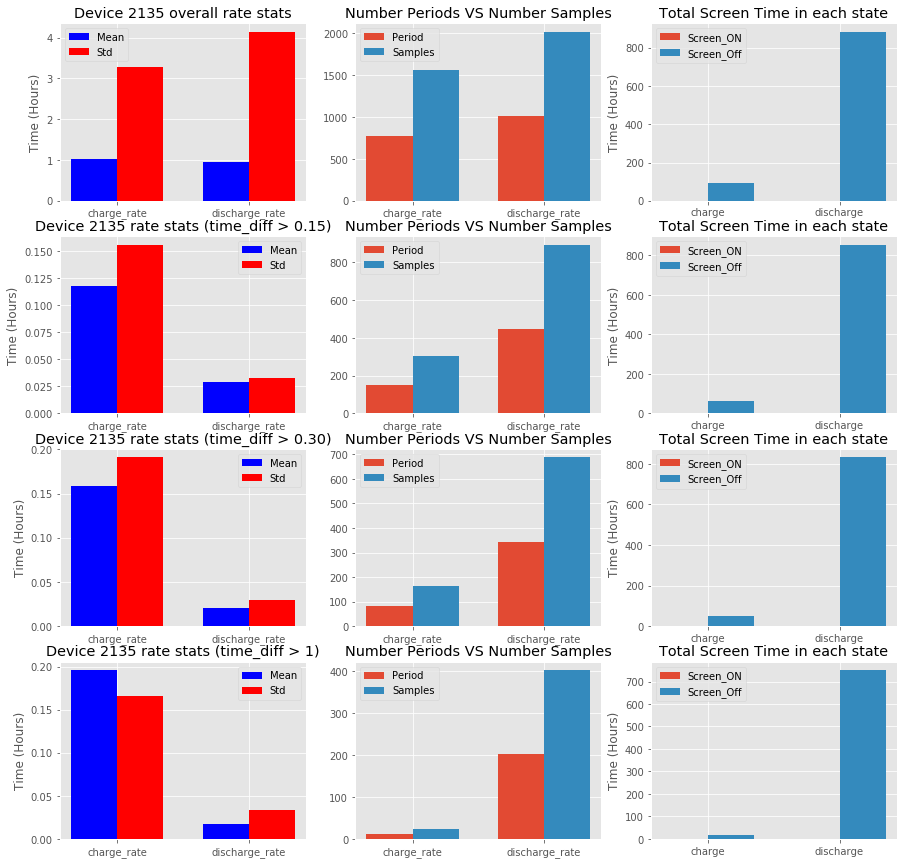

-------------------------------------------------------------------------------------------------------------


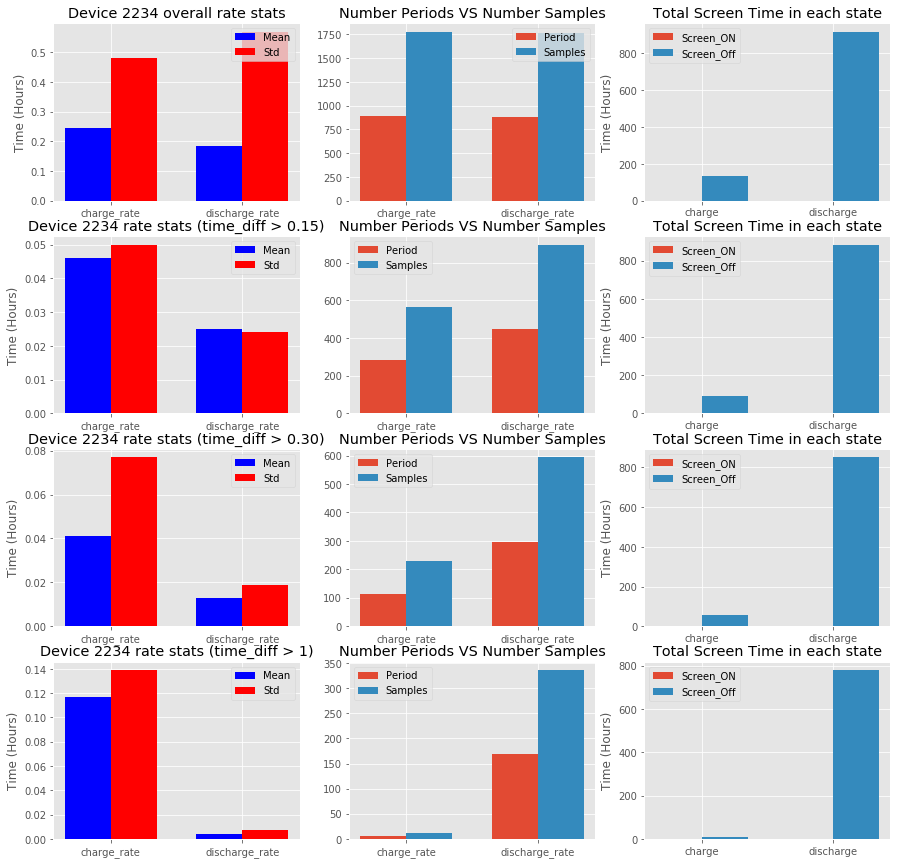

-------------------------------------------------------------------------------------------------------------


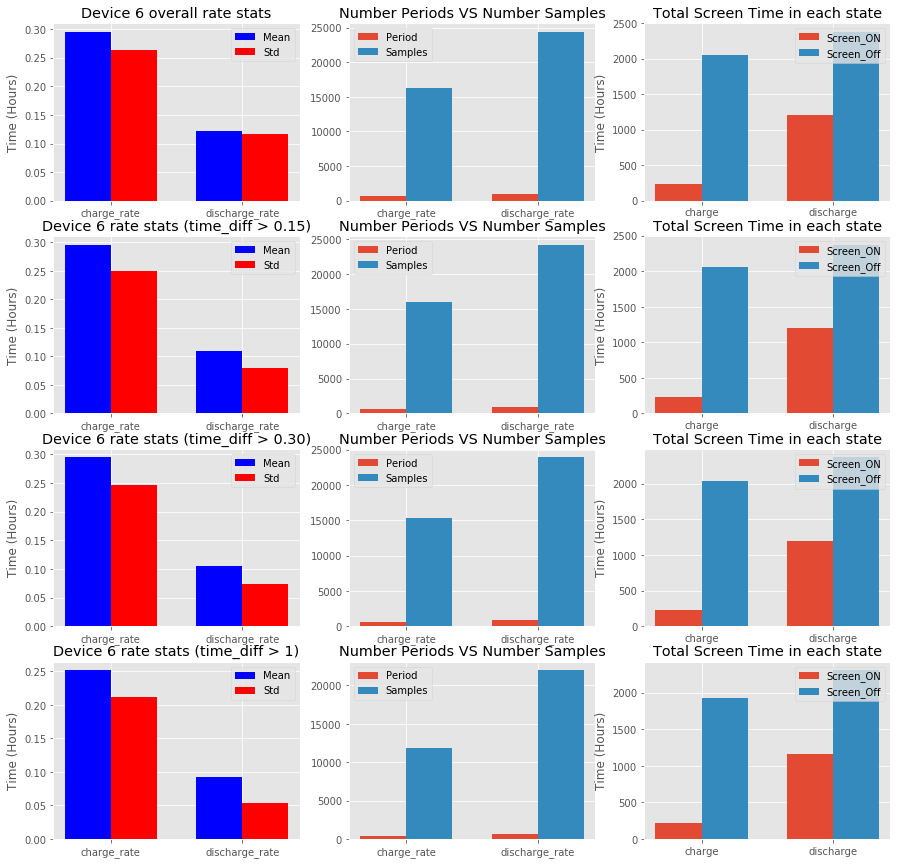

-------------------------------------------------------------------------------------------------------------


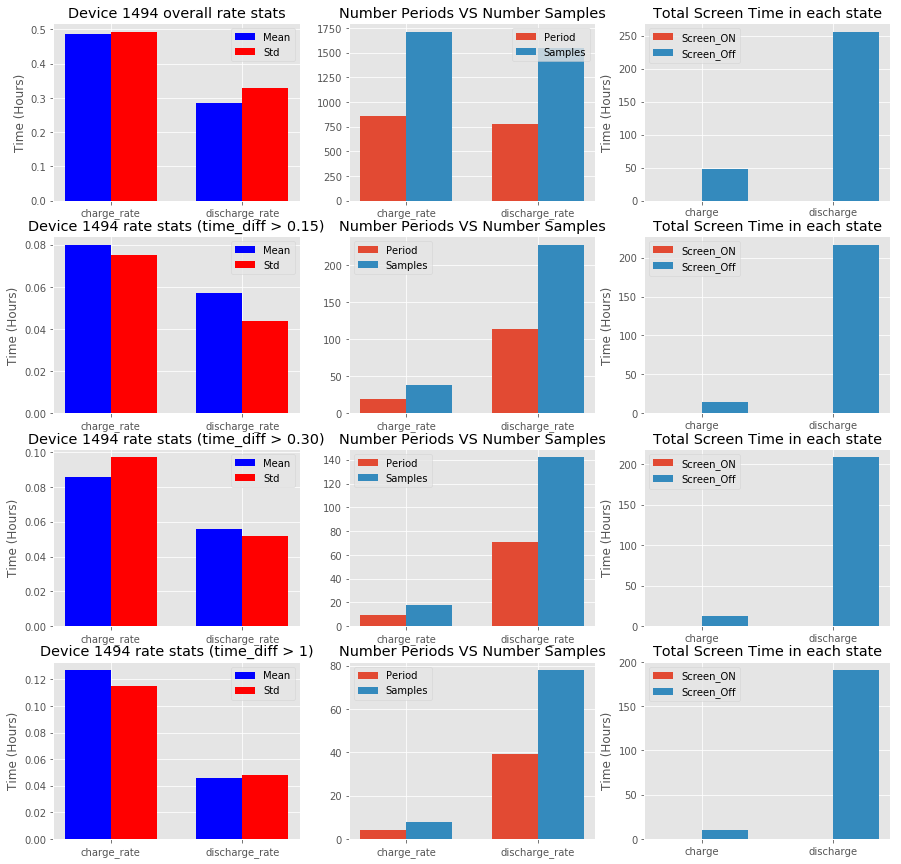

-------------------------------------------------------------------------------------------------------------


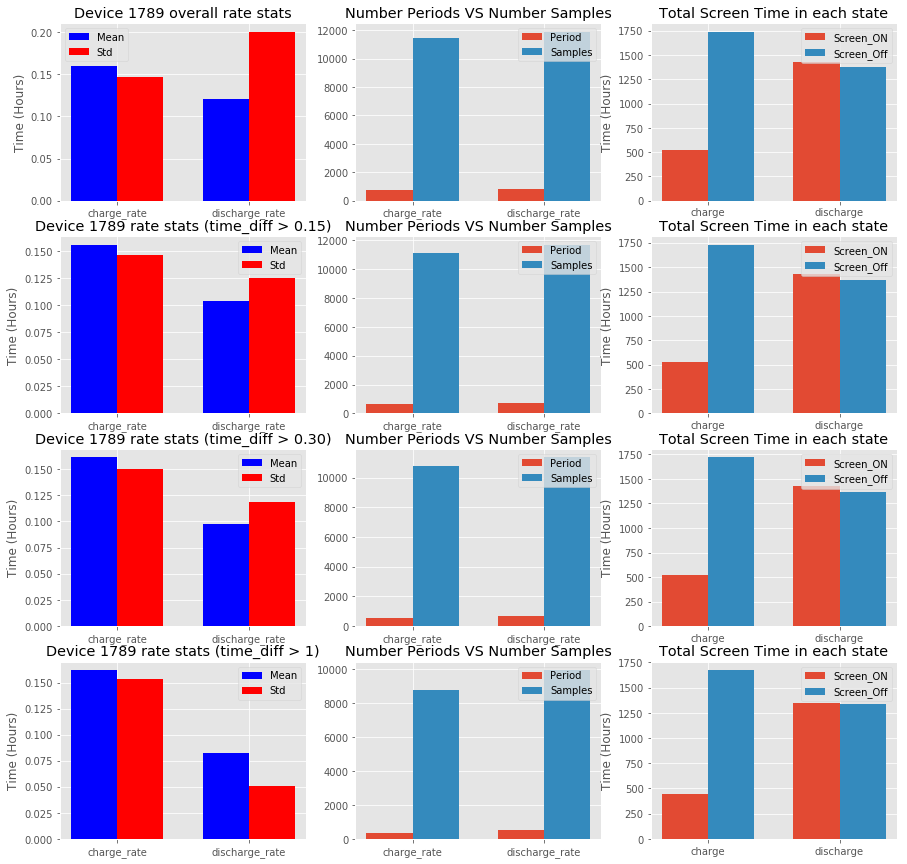

-------------------------------------------------------------------------------------------------------------


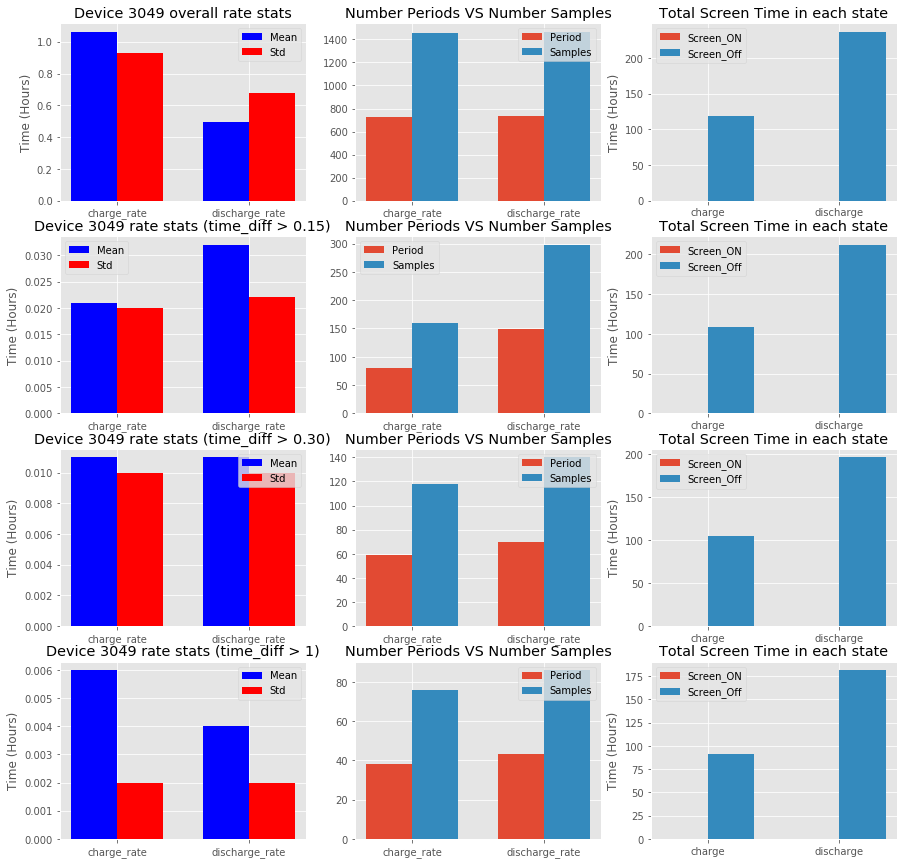

-------------------------------------------------------------------------------------------------------------


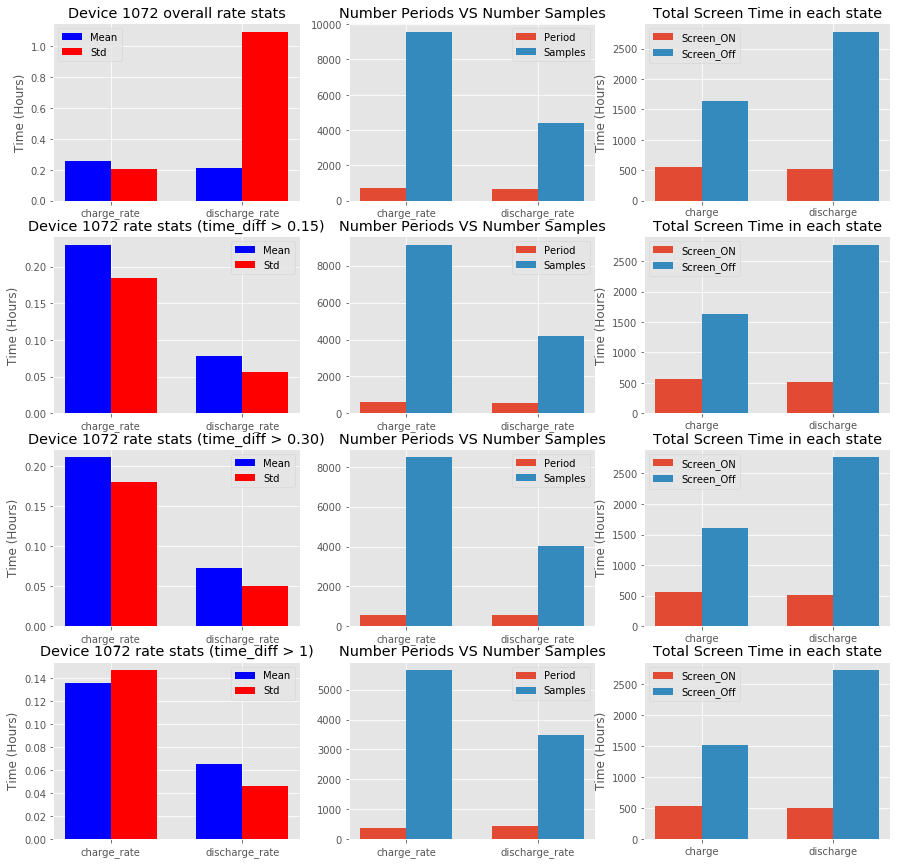

-------------------------------------------------------------------------------------------------------------


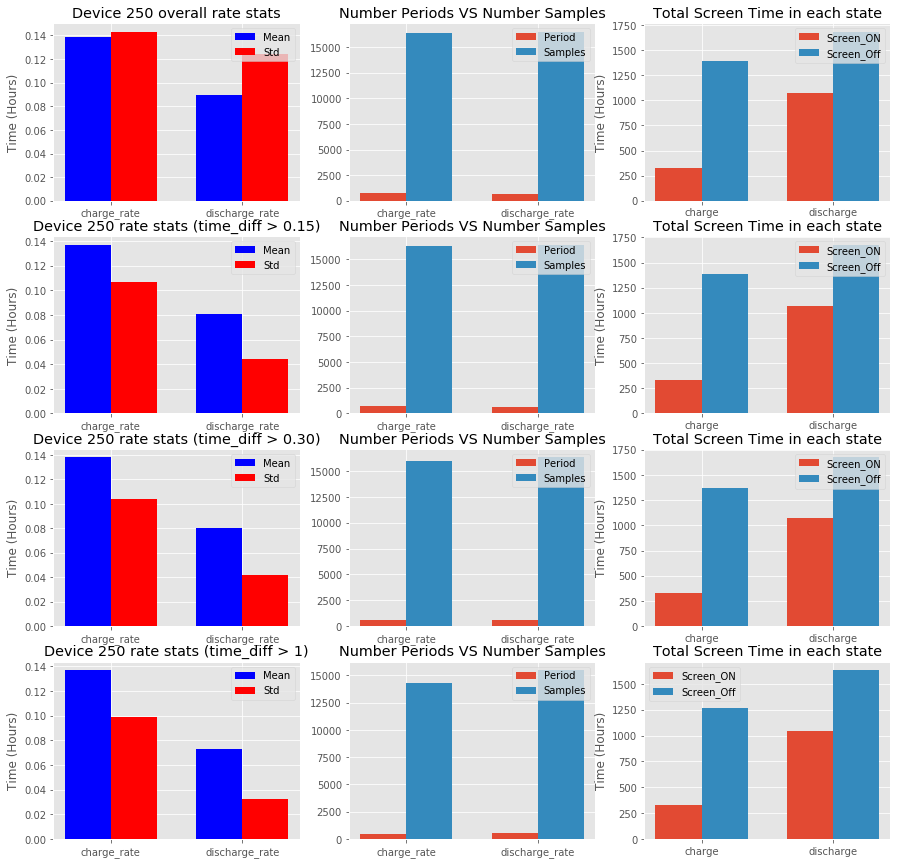

-------------------------------------------------------------------------------------------------------------


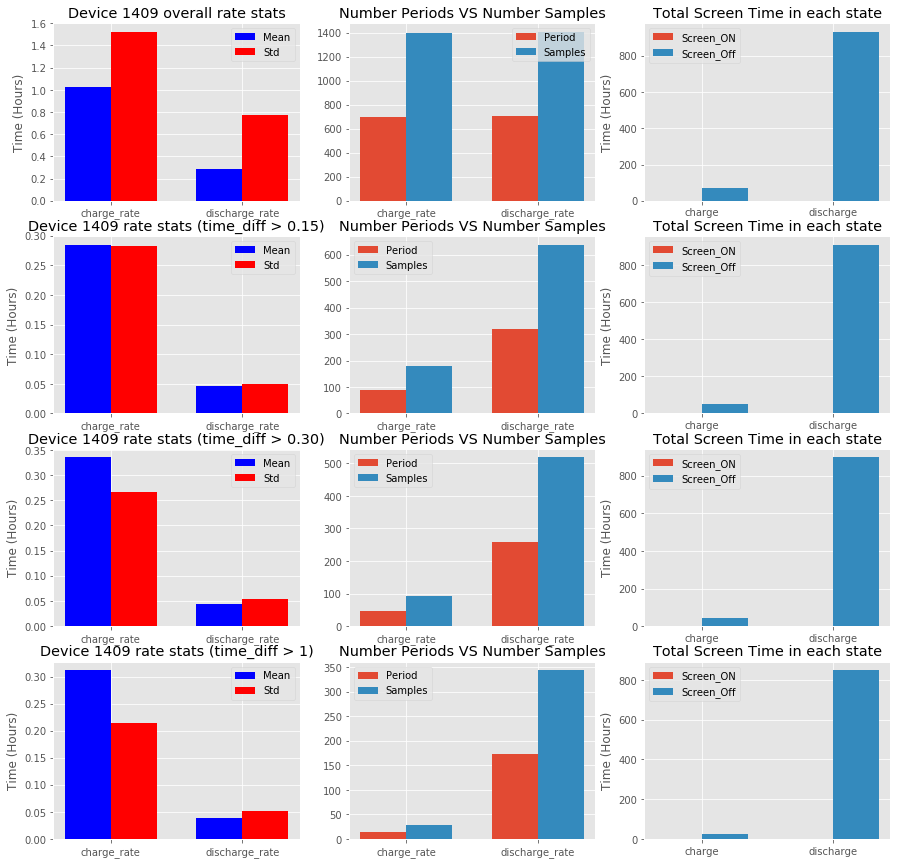

-------------------------------------------------------------------------------------------------------------


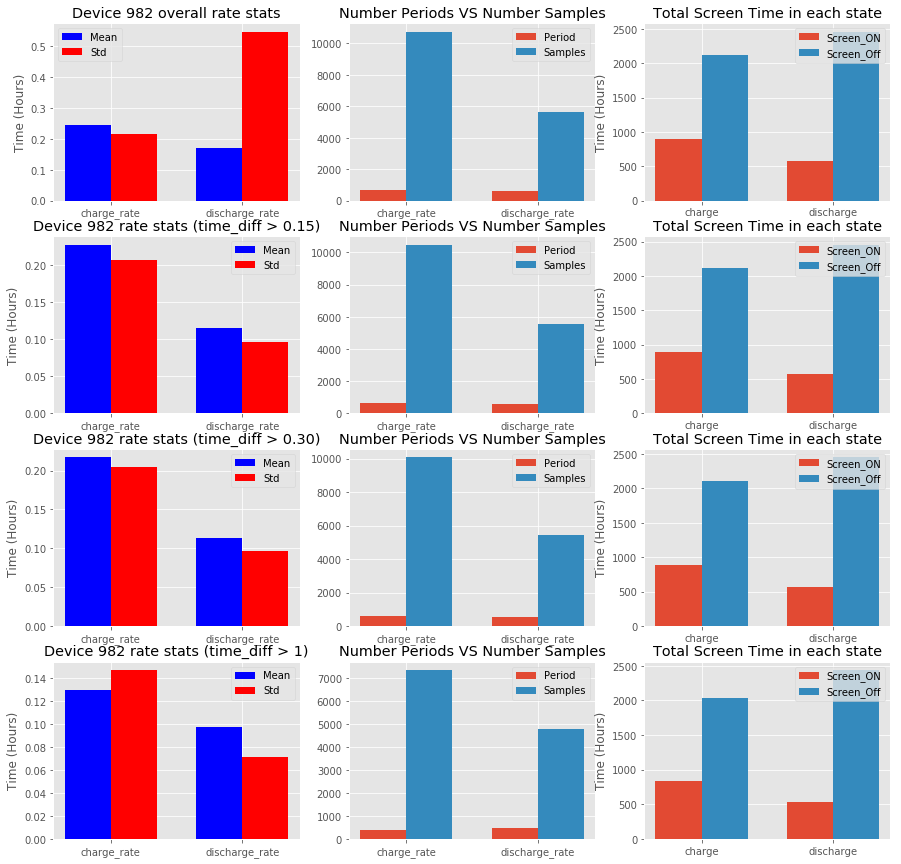

-------------------------------------------------------------------------------------------------------------


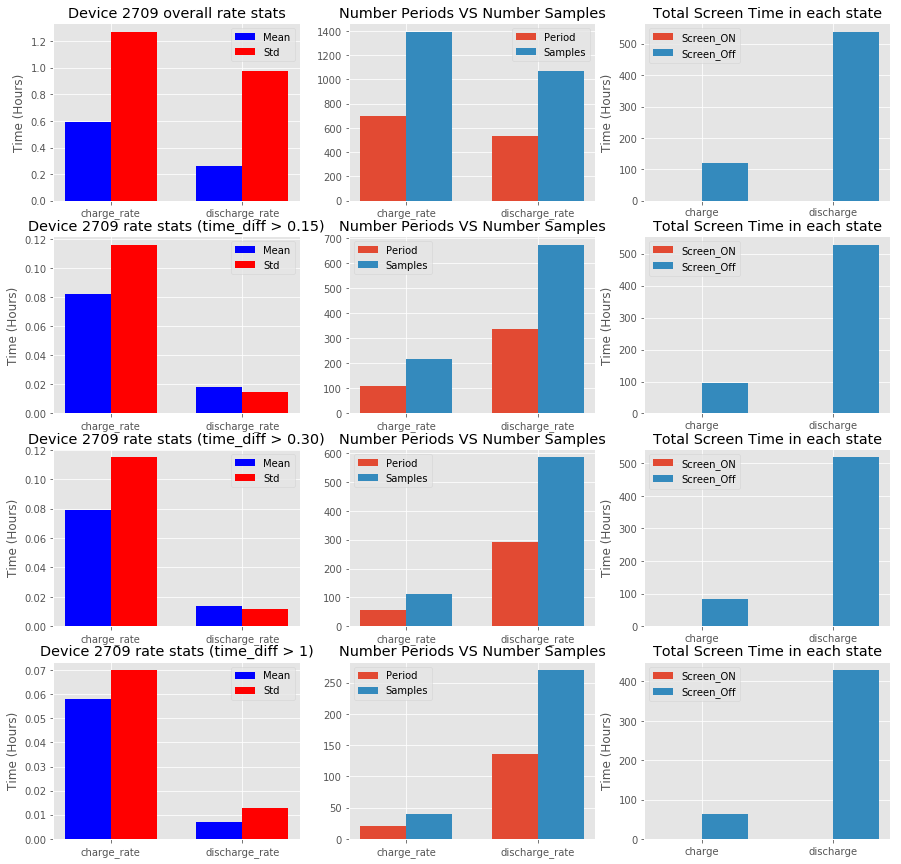

-------------------------------------------------------------------------------------------------------------


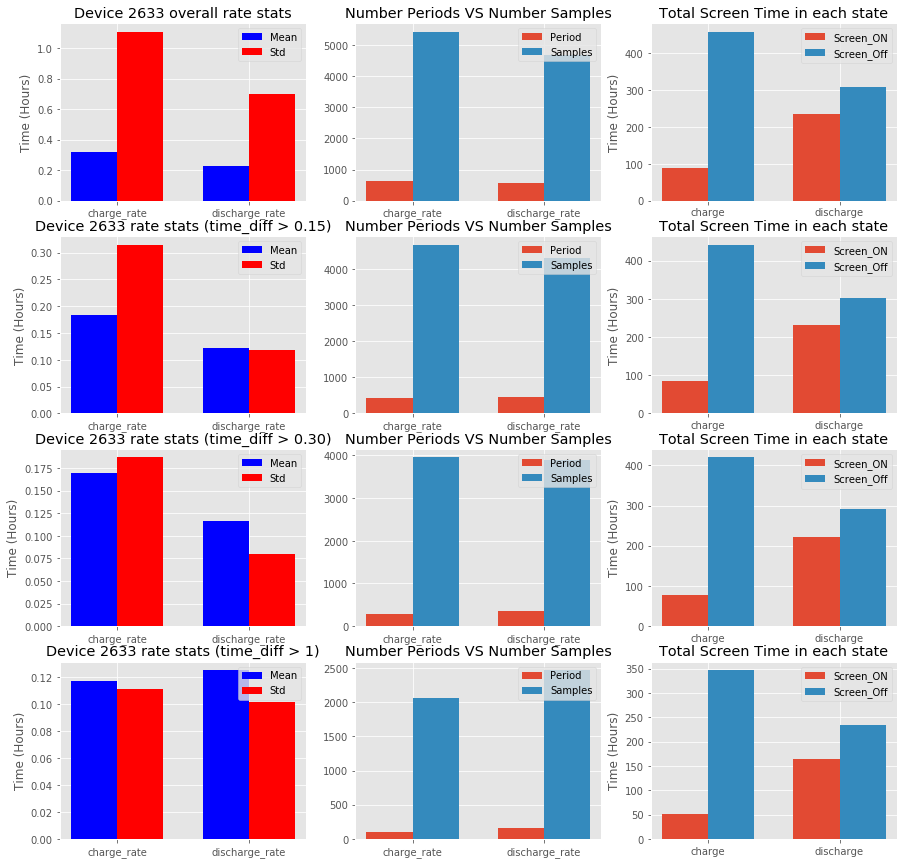

-------------------------------------------------------------------------------------------------------------


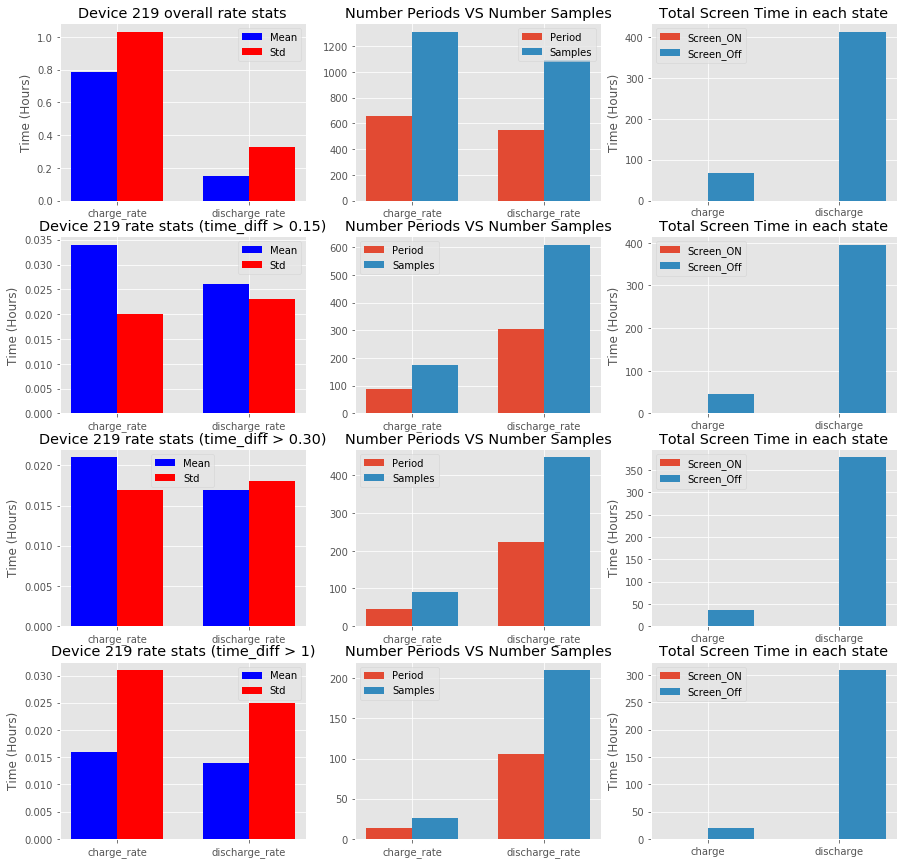

-------------------------------------------------------------------------------------------------------------


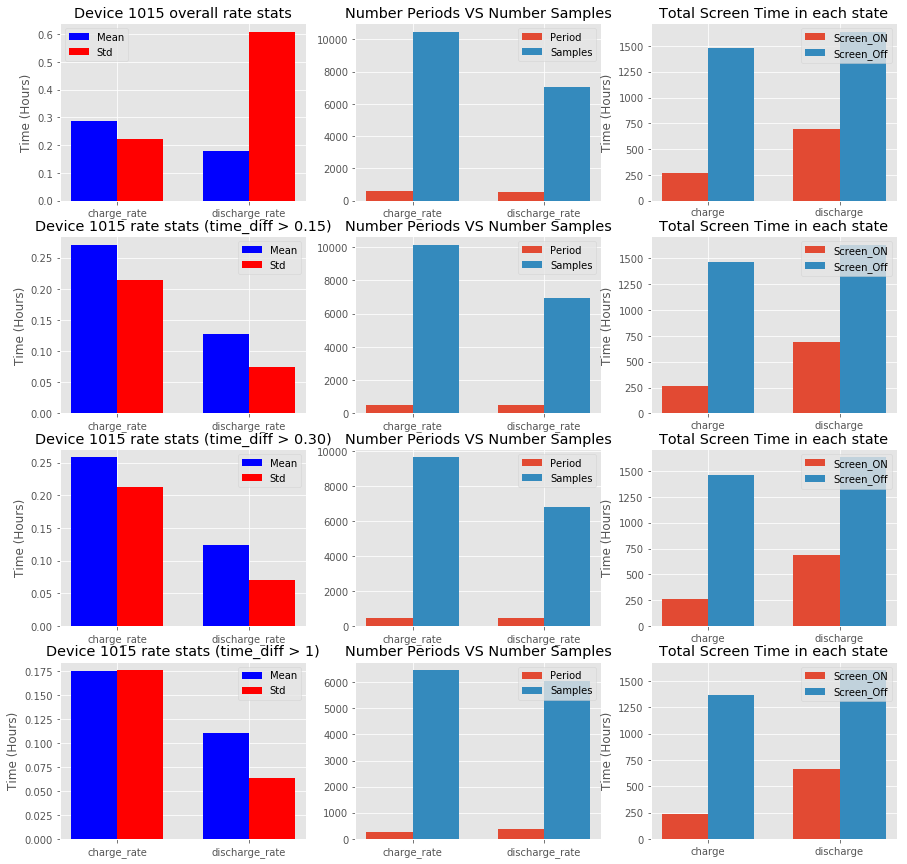

-------------------------------------------------------------------------------------------------------------


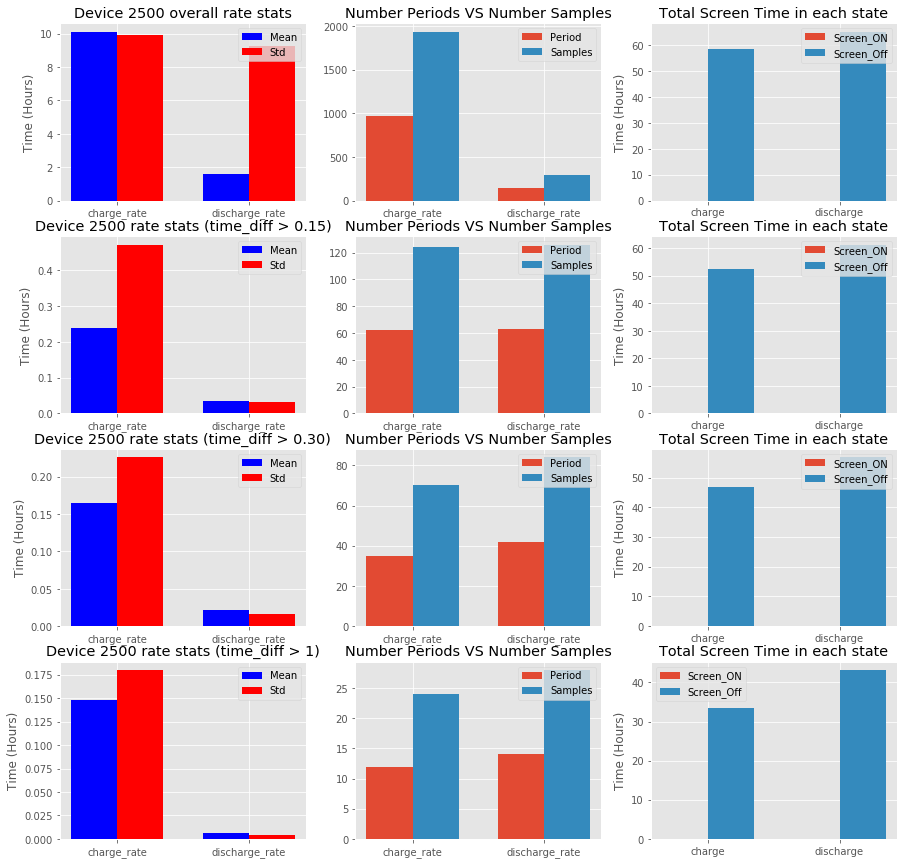

-------------------------------------------------------------------------------------------------------------


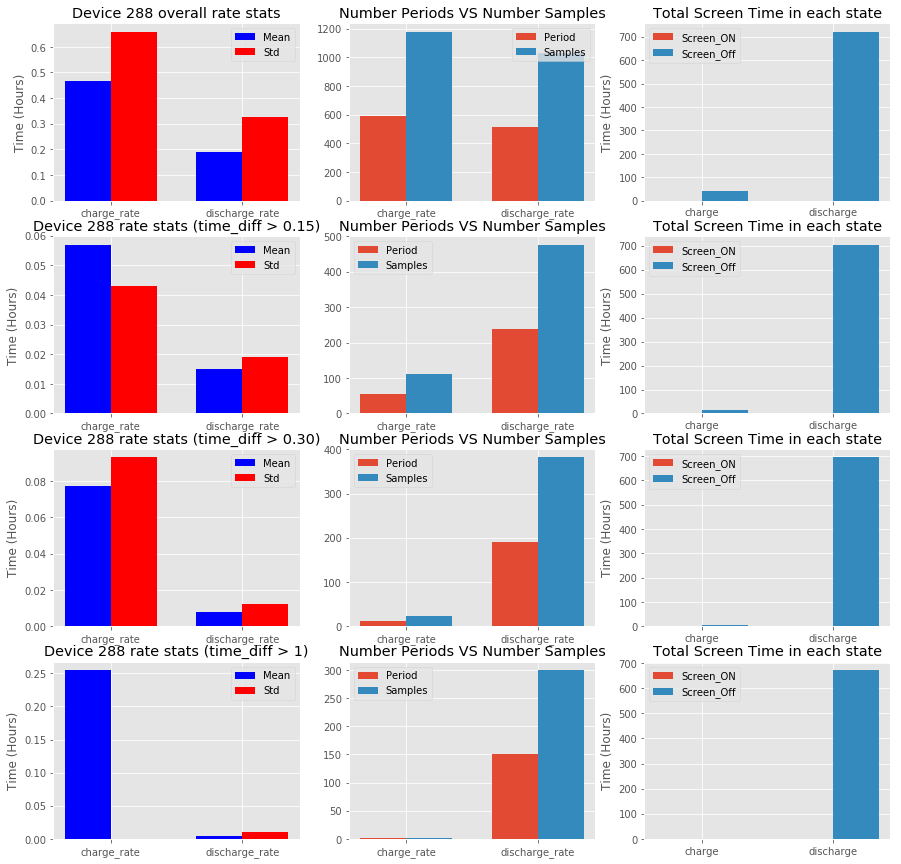

-------------------------------------------------------------------------------------------------------------


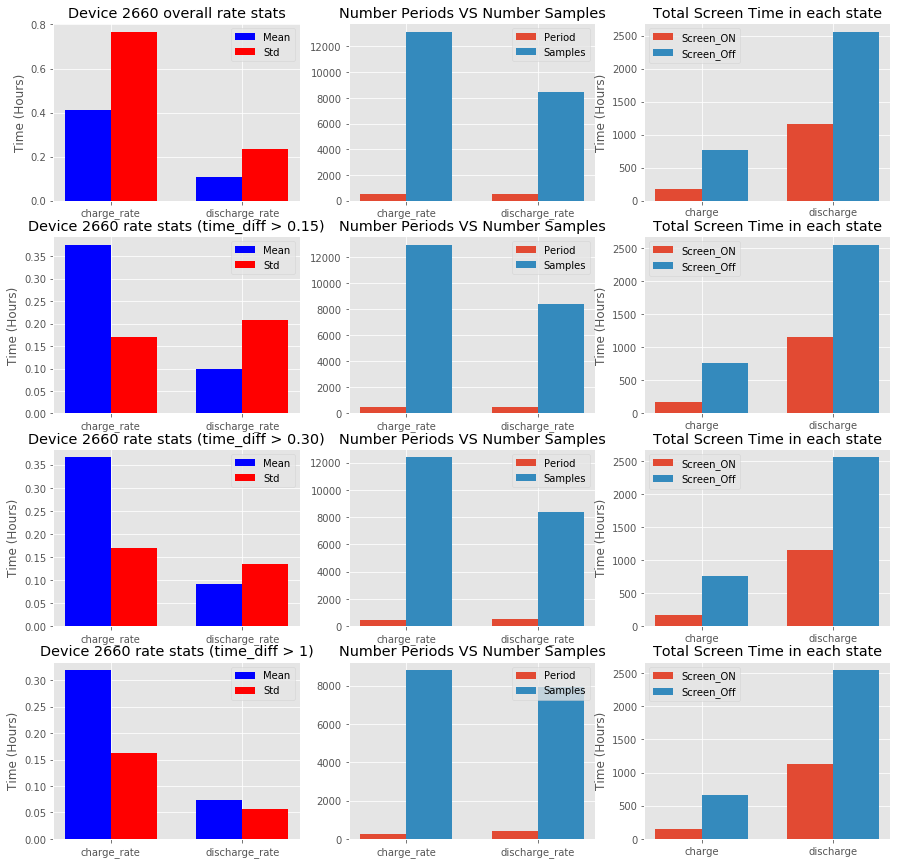

-------------------------------------------------------------------------------------------------------------


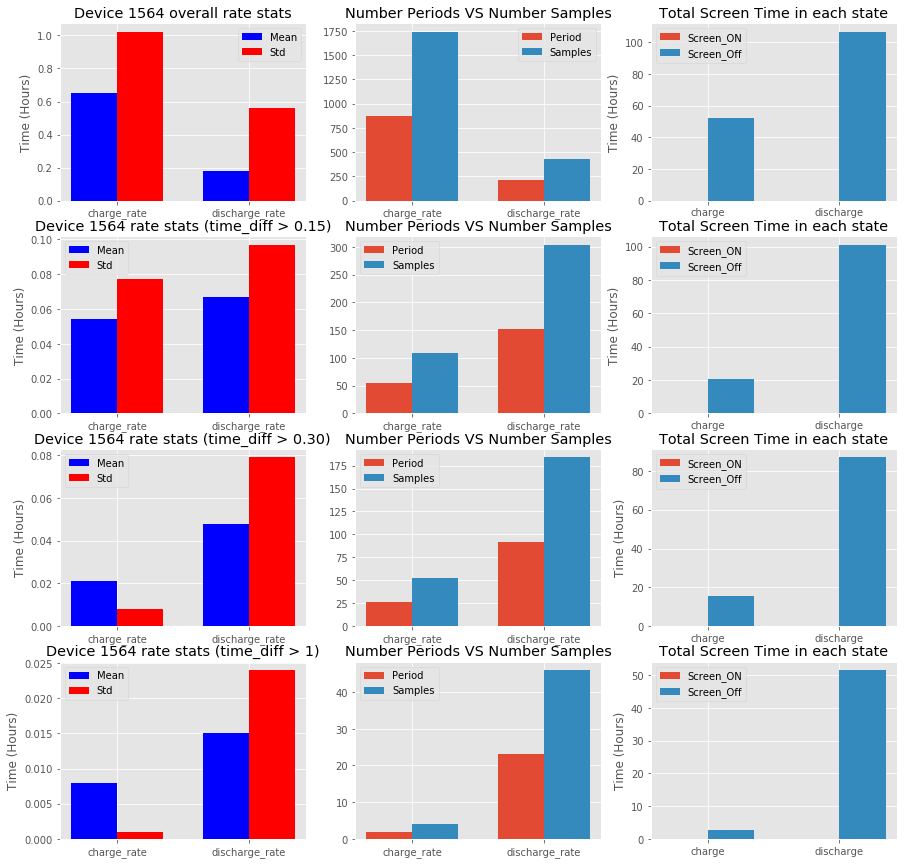

-------------------------------------------------------------------------------------------------------------


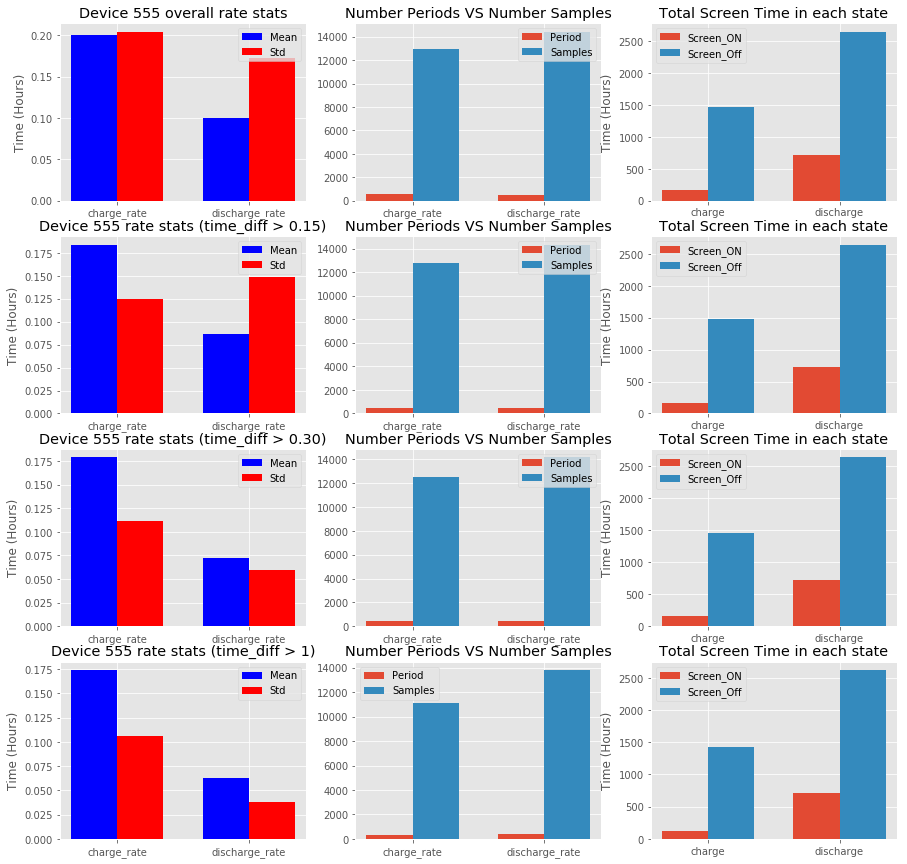

-------------------------------------------------------------------------------------------------------------


In [3]:
def plotScreenTime(dev_samples, title, devID):
    charge_screen_on_time = dev_samples[dev_samples.charging == True].screen_on_time.sum()
    charge_screen_off_time = dev_samples[dev_samples.charging == True].screen_off_time.sum()
    
    discharge_screen_on_time = dev_samples[dev_samples.charging == False].screen_on_time.sum()
    discharge_screen_off_time = dev_samples[dev_samples.charging == False].screen_off_time.sum()
    
    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35
    
    rec1 = plt.bar(x, [charge_screen_on_time, discharge_screen_on_time], width)
    rec2 = plt.bar(x+width, [charge_screen_off_time, discharge_screen_off_time], width)  

    plt.title(title)
    plt.xticks(x + width / 2, ('charge','discharge'))
    plt.legend(['Screen_ON', 'Screen_Off'])
    plt.ylabel('Time (Hours)')

def plotRate_NumberSamples(dev_samples, title, devID):
    charge_number_periods = len(dev_samples[dev_samples.charging == True])
    charge_number_samples = dev_samples[dev_samples.charging == True].number_samples.sum()
    
    discharge_number_periods = len(dev_samples[dev_samples.charging == False])
    discharge_number_samples = dev_samples[dev_samples.charging == False].number_samples.sum()
    
    charge_number_samples_mean = dev_samples[dev_samples.charging == True].number_samples.mean()
    discharge_number_samples_mean = dev_samples[dev_samples.charging == False].number_samples.mean()
    
    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35
    
    plt.bar(x, [charge_number_periods, discharge_number_periods], width)
    plt.bar(x+width, [charge_number_samples, discharge_number_samples], width)

    plt.title(title)
    plt.xticks(x + width / 2, ('charge_rate','discharge_rate'))
    plt.legend(['Period', 'Samples', 'Avg Samples'])
    
    
def plotRateStat(dev_samples, title, devID):
    charge_rate_mean = dev_samples[dev_samples.charging == True].rate.mean()
    charge_rate_std = dev_samples[dev_samples.charging == True].rate.std()

    discharge_rate_mean = dev_samples[dev_samples.charging == False].rate.mean()
    discharge_rate_std = dev_samples[dev_samples.charging == False].rate.std()

    # -------------------------------------------------------
    x = np.arange(2)
    width = 0.35

    plt.bar(x, [round(charge_rate_mean, 3), abs(round(discharge_rate_mean, 3))], width, color='b')
    plt.bar(x+width, [abs(round(charge_rate_std, 3)), abs(round(discharge_rate_std, 3))], width, color='r')    

    plt.ylabel('Time (Hours)')
    plt.title(title % devID)
    plt.xticks(x + width / 2, ('charge_rate','discharge_rate'))
    plt.legend(['Mean', 'Std'])


def computeRatesDevicePlot(devID):
    dev_samples = facts_table[facts_table.device_id == devID]
    
    plt.subplots(4,3,figsize=(15, 15))
    plt.subplot(4, 3, 1)
    plotRateStat(dev_samples, 'Device %i overall rate stats', devID)
    plt.subplot(4, 3, 2)
    plotRate_NumberSamples(dev_samples, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 3)
    plotScreenTime(dev_samples, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 4)
    dev_samples_15 = dev_samples[dev_samples.time_diff > 0.15]
    plotRateStat(dev_samples_15, 'Device %i rate stats (time_diff > 0.15)', devID)
    plt.subplot(4, 3, 5)
    plotRate_NumberSamples(dev_samples_15, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 6)
    plotScreenTime(dev_samples_15, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 7)
    dev_samples_30 = dev_samples[dev_samples.time_diff > 0.3]
    plotRateStat(dev_samples_30, 'Device %i rate stats (time_diff > 0.30)', devID)
    plt.subplot(4, 3, 8)
    plotRate_NumberSamples(dev_samples_30, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 9)
    plotScreenTime(dev_samples_30, 'Total Screen Time in each state', devID)

    plt.subplot(4, 3, 10)
    dev_samples_1 = dev_samples[dev_samples.time_diff > 1]
    plotRateStat(dev_samples_1, 'Device %i rate stats (time_diff > 1)', devID)
    plt.subplot(4, 3, 11)
    plotRate_NumberSamples(dev_samples_1, 'Number Periods VS Number Samples', devID)
    plt.subplot(4, 3, 12)
    plotScreenTime(dev_samples_1, 'Total Screen Time in each state', devID)

    plt.show()
    
    
for dev_id in facts_table.groupby('device_id').count().sort_values(by='time_diff', ascending=False)[0:20].index:
    computeRatesDevicePlot(dev_id)
    print('-------------------------------------------------------------------------------------------------------------')
 